In [156]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')

In [125]:
df = pd.read_csv('stud_math.csv')

In [126]:
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [5]:
# Переименуем колонки для удобства (изменим заглавные буквы на строчные)
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

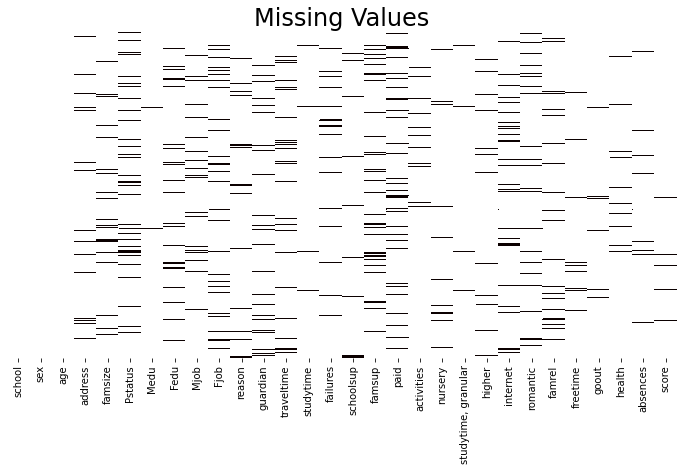

In [128]:
fig = plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.isnull(), cbar=False, cmap='hot_r', yticklabels=[]).set_title('Missing Values', fontsize=24)

# Заполним пропуски и отфтльтруем данные

### score

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

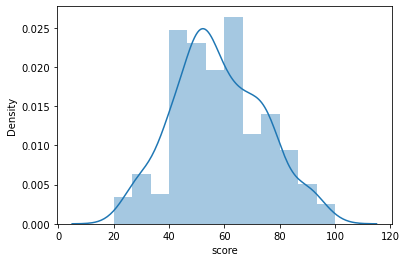

In [147]:
# Т.к. "оценка" ("score") это основной параметр, то просто удалим незаполненные строки
df = df[df.score.notna()]

#  В датасете присутсвует 37 значений 'score' равных '0'.
#  Т.к следующее значение равняется '25', то предположим,
# что 0 получили учащиеся, которые не явились на экзамен.
#  Поэтому эти строки также удаляем.
df = df.loc[df['score'] > 0]
df = df.reset_index()

sns.distplot(df.score)
df.score.describe()

### school

GP    311
MS     41
Name: school, dtype: int64

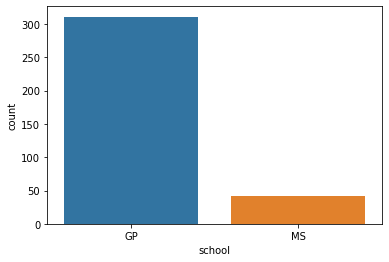

In [9]:
sns.countplot(data = df, x = df.school)
df.school.value_counts()

### sex

F    182
M    170
Name: sex, dtype: int64

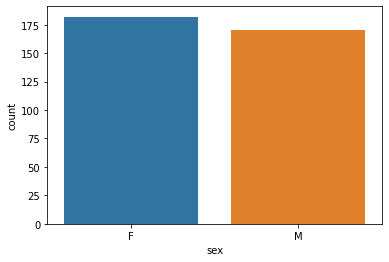

In [10]:
sns.countplot(data = df, x = df.sex)
df.sex.value_counts()

### Age

15    76
16    96
17    90
18    69
19    16
20     3
21     1
22     1
Name: age, dtype: int64

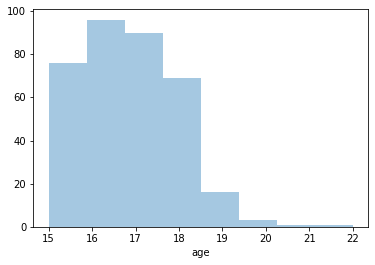

In [11]:
sns.distplot(df.age, kde = False, bins = 8)
df.age.value_counts().sort_index()

### Address

In [12]:
# Заполним пропуски наиболее часто встречающимся значением
df.address.fillna(df.address.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  352 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB


None

U    279
R     73
Name: address, dtype: int64

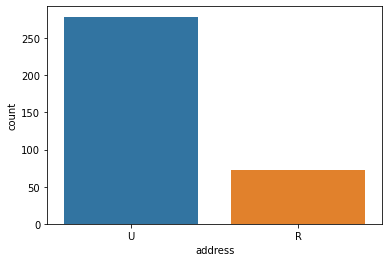

In [32]:
display(df.loc[:, ['address']].info())
sns.countplot(df.address)
df.address.value_counts()

### family size

In [13]:
# Заполним пропуски наиболее часто встречающимся значением
df.famsize.fillna(df.famsize.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


GT3    252
LE3    100
Name: famsize, dtype: int64

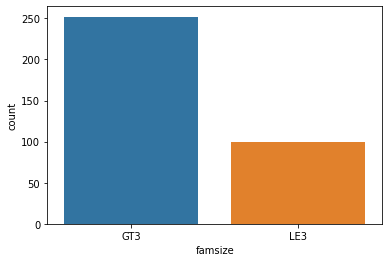

In [14]:
sns.countplot(df.famsize)
df.loc[:,['famsize']].info()
df.famsize.value_counts()

### pstatus

In [15]:
# Заполним пропуски наиболее часто встречающимся значением
df.pstatus.fillna(df.pstatus.value_counts().idxmax(), inplace = True)

In [16]:
df.loc[:,['pstatus']].info()
df.pstatus.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


T    318
A     34
Name: pstatus, dtype: int64

### medu

In [17]:
#  Показатель образования матери сильно коррелирует с показателем образованием отца,
# поэтому проупуски заполним на основе другого показателя

def medu_filling(row):
    if pd.isnull(row['medu']):
        if row['fedu'] == 4:
            return 4
        if row['fedu'] == 3:
            return 3
        if row['fedu'] < 3:
            return 2
        if row['fedu'].isnull():
            return row['medu']
    return row['medu']

4.0    125
2.0     89
3.0     88
1.0     47
0.0      3
Name: medu, dtype: int64

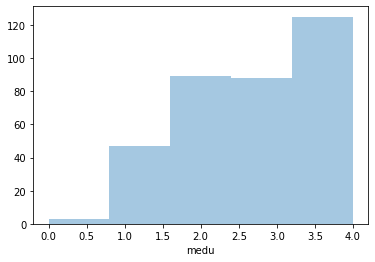

In [18]:
df.medu = df.apply(medu_filling, axis = 1)
sns.distplot(df.medu, bins = 5, kde = False)
df.medu.value_counts()

### fedu

In [19]:
df.fedu.value_counts()

2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: fedu, dtype: int64

In [20]:
# Имеется один выброс, значение которого - 40. Можно считать, что это опечатка. Изменим 40 на 4.
df.at[df.loc[df.fedu == 40].index, 'fedu'] = 4

In [21]:
#  Показатель образования отца сильно коррелирует с показателем образованием отца,
# поэтому проупуски заполним на основе другого показателя

def fedu_filling(row):
    if pd.isnull(row['fedu']):
        if row['medu'] == 4:
            return 4
        if row['medu'] == 3:
            return 3
        if row['medu'] == 2:
            return 2
        if row['medu'] < 2:
            return 1
        if row['medu'].isnull():
            return row['fedu']
    return row['fedu']

<AxesSubplot:xlabel='fedu'>

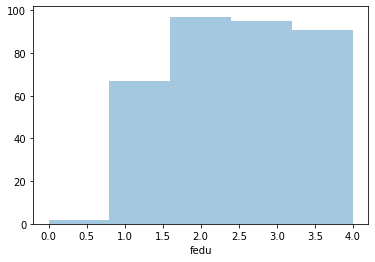

In [22]:
df.fedu = df.apply(fedu_filling, axis = 1)
sns.distplot(df.fedu, bins = 5, kde = False)

### mjob

In [23]:
# Пропуски заполним значением 'other'
df.mjob.fillna(df.mjob.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


other       132
services     90
teacher      51
at_home      49
health       30
Name: mjob, dtype: int64

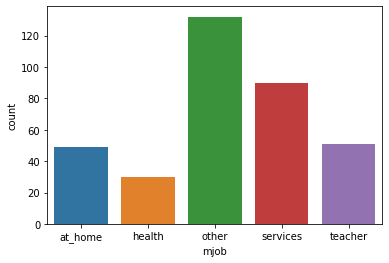

In [64]:
sns.countplot(df.mjob)
df.loc[:, ['mjob']].info()
df.mjob.value_counts()

### fjob

In [24]:
# Пропуски заполним значением 'other'
df.fjob.fillna(df.fjob.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


other       208
services     89
teacher      26
health       15
at_home      14
Name: fjob, dtype: int64

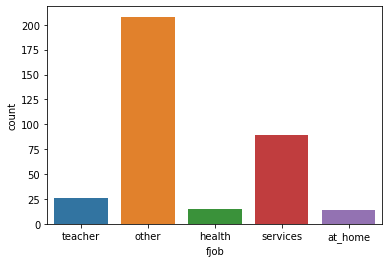

In [66]:
sns.countplot(df.fjob)
df.loc[:, ['fjob']].info()
df.fjob.value_counts()

### reason

In [25]:
df.reason.value_counts()

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

In [26]:
# Т.к. значения приблизительно равные и есть вариант "другое"("other"), именно им мы заполним пропуски
df.reason.fillna(df.reason.value_counts().idxmin(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


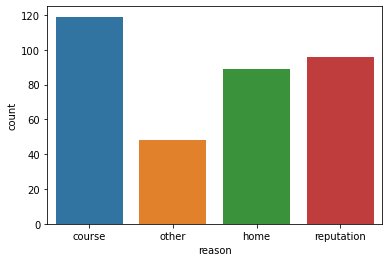

In [27]:
sns.countplot(df.reason)
df.loc[:, ['reason']].info()

### guardian

In [28]:
# Заполним пропуски наиболее часто встречающимся значением
df.guardian.fillna(df.guardian.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


mother    254
father     78
other      20
Name: guardian, dtype: int64

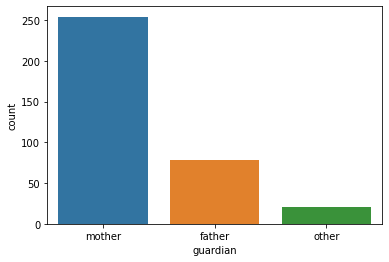

In [29]:
sns.countplot(df.guardian)
df.loc[:, ['guardian']].info()
df.guardian.value_counts()

### travel time

In [30]:
# Подавляющее большинство учеников живет рядом со школой, поэтому заполним пропуски "1"
df.traveltime.fillna(df.traveltime.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  352 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


1.0    242
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

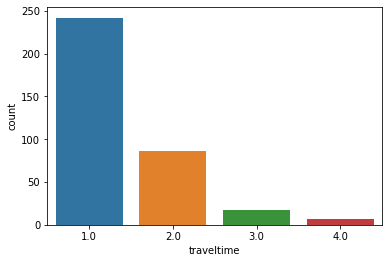

In [83]:
sns.countplot(df.traveltime)
df.loc[:, ['traveltime']].info()
df.traveltime.value_counts()

### studytime

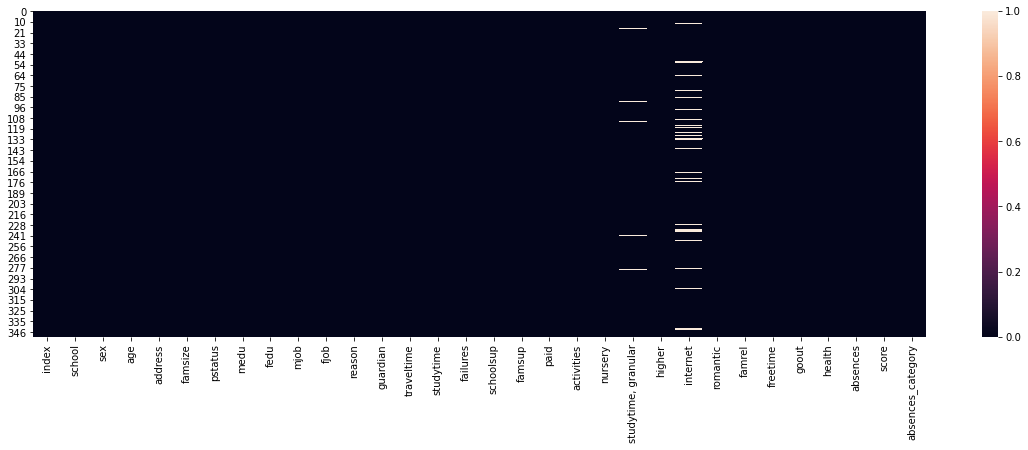

In [107]:
fig = plt.figure(figsize=(20, 6))
heat = sns.heatmap(pd.isnull(df))

In [47]:
# Заполним пропуски наиболее часто встречающимся значением
df.studytime.fillna(df.studytime.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  352 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


2.0    180
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64

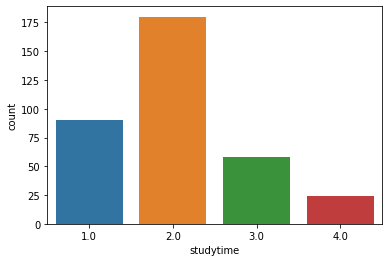

In [59]:
sns.countplot(df.studytime)
df.loc[:, ['studytime']].info()
df.studytime.value_counts()

### failures

In [51]:
# Заполним пропуски наиболее часто встречающимся значением
df.failures.fillna(df.failures.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  352 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


0.0    293
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

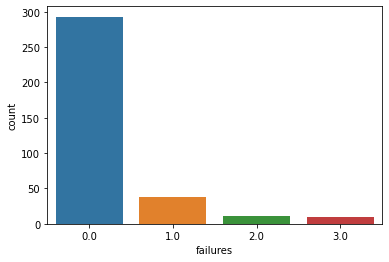

In [53]:
sns.countplot(df.failures)
df.loc[:, ['failures']].info()
df.failures.value_counts()

### schoolsup

In [54]:
# Заполним пропуски наиболее часто встречающимся значением
df.schoolsup.fillna(df.schoolsup.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


no     304
yes     48
Name: schoolsup, dtype: int64

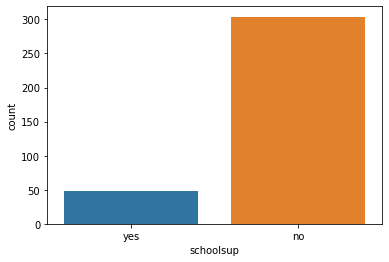

In [62]:
sns.countplot(df.schoolsup)
df.loc[:, ['schoolsup']].info()
df.schoolsup.value_counts()

### famsup

In [56]:
# Заполним пропуски наиболее часто встречающимся значением
df.famsup.fillna(df.famsup.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


yes    232
no     120
Name: famsup, dtype: int64

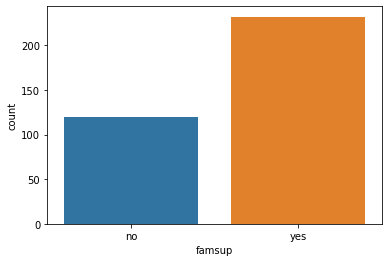

In [63]:
sns.countplot(df.famsup)
df.loc[:, ['famsup']].info()
df.famsup.value_counts()

### paid

In [68]:
# Заполним пропуски наиболее часто встречающимся значением
df.paid.fillna(df.paid.value_counts().idxmax(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


no     206
yes    146
Name: paid, dtype: int64

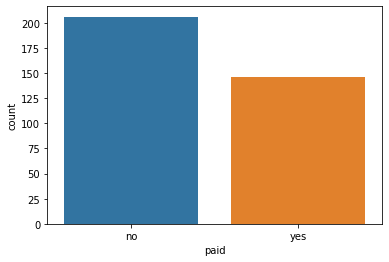

In [66]:
df.loc[:, ['paid']].info()
sns.countplot(df.paid)
df.paid.value_counts()

### activities

In [70]:
#  Т.к. значения практически равны, 
# заполним пропуски в зависимости от колонки "studytime" (время на учёбу помимо школы в неделю) 

def activities_filling(row):
    if pd.isnull(row['activities']):
        if row['studytime'] == 1:
            return 'no'
        if row['studytime'] > 1:
            return 'yes'
    return row['activities']

df.activities = df.apply(activities_filling, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


yes    179
no     173
Name: activities, dtype: int64

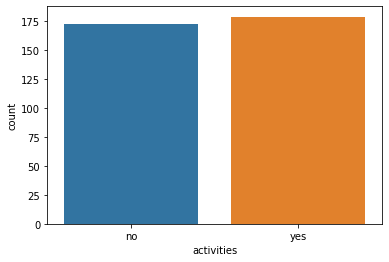

In [71]:
df.loc[:, ['activities']].info()
sns.countplot(df.activities)
df.activities.value_counts()

### nursery

In [74]:
# Заполним пропуски наиболее часто встречающимся значением
df.nursery.fillna(df.nursery.value_counts().idxmax(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


yes    284
no      68
Name: nursery, dtype: int64

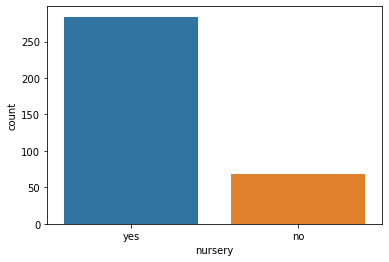

In [75]:
sns.countplot(df.nursery)
df.loc[:, ['nursery']].info()
df.nursery.value_counts()

### higher

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  305 non-null    object
dtypes: object(1)
memory usage: 14.8+ KB


yes    297
no       8
Name: higher, dtype: int64

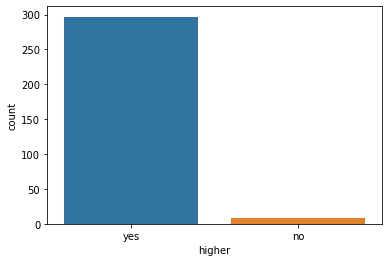

In [109]:
# Заполним пропуски наиболее часто встречающимся значением
df.higher.fillna(df.higher.value_counts().idxmax(), inplace=True)

df.loc[:, ['higher']].info()
sns.countplot(df.higher)
df.higher.value_counts()

### internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  305 non-null    object
dtypes: object(1)
memory usage: 14.8+ KB


yes    259
no      46
Name: internet, dtype: int64

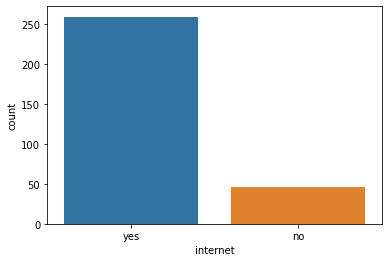

In [108]:
# Заполним пропуски наиболее часто встречающимся значением
df.internet.fillna(df.internet.value_counts().idxmax(), inplace=True)

sns.countplot(df.internet)
df.loc[:, ['internet']].info()
df.internet.value_counts()

### romantic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


no     248
yes    104
Name: romantic, dtype: int64

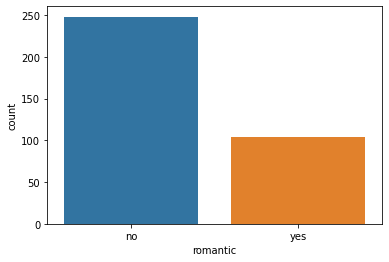

In [80]:
# Заполним пропуски наиболее часто встречающимся значением
df.romantic.fillna(df.romantic.value_counts().idxmax(), inplace=True)

sns.countplot(df.romantic)
df.loc[:, ['romantic']].info()
df.romantic.value_counts()

### famrel

In [81]:
df.famrel.value_counts()

 4.0    163
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  352 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


<AxesSubplot:xlabel='famrel', ylabel='count'>

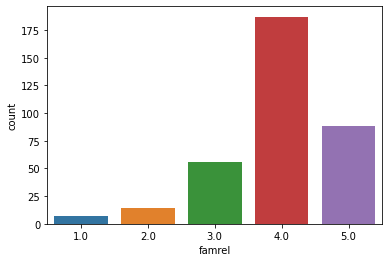

In [85]:
# Присутстувует один выброс. Скорее всего это опечатка - знак "-" лишний, уберем его
df.at[df.loc[df.famrel == -1].index, 'famrel'] = 1

# Заполним пропуски наиболее часто встречающимся значением
df.famrel.fillna(df.famrel.value_counts().idxmax(), inplace=True)

df.loc[:, ['famrel']].info()
sns.countplot(df.famrel)

### freetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  352 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


3.0    140
4.0    102
2.0     59
5.0     35
1.0     16
Name: freetime, dtype: int64

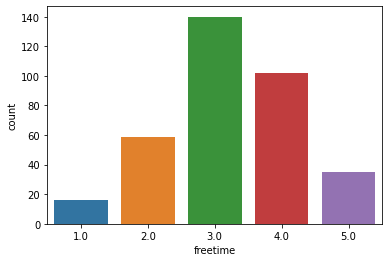

In [87]:
# Заполним пропуски наиболее часто встречающимся значением
df.freetime.fillna(df.freetime.value_counts().idxmax(), inplace=True)

sns.countplot(df.freetime)
df.loc[:, ['freetime']].info()
df.freetime.value_counts()

### goout

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   352 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


3.0    124
2.0     92
4.0     74
5.0     43
1.0     19
Name: goout, dtype: int64

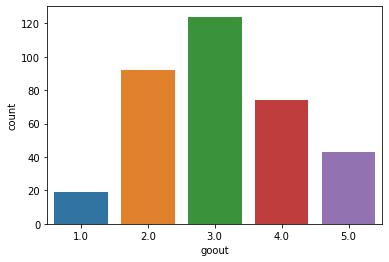

In [89]:
# Заполним пропуски наиболее часто встречающимся значением
df.goout.fillna(df.goout.value_counts().idxmax(), inplace=True)

sns.countplot(df.goout)
df.loc[:, ['goout']].info()
df.goout.value_counts()

### health

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  352 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


5.0    137
3.0     81
4.0     53
1.0     45
2.0     36
Name: health, dtype: int64

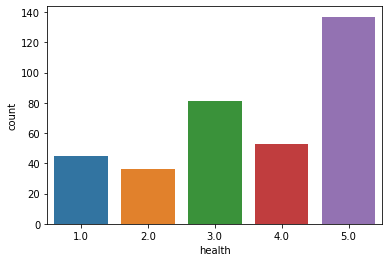

In [90]:
# Заполним пропуски наиболее часто встречающимся значением
df.health.fillna(df.health.value_counts().idxmax(), inplace=True)

sns.countplot(df.health)
df.loc[:, ['health']].info()
df.health.value_counts()

### absences

25-й перцентиль: 2.0, 75-й перцентиль: 7.0, IQR: 5.0, границы выбросов: [-5.5; 14.5]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  305 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


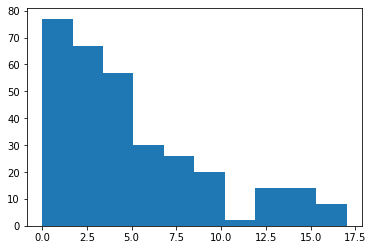

In [101]:
plt.hist(df.absences)

# Параметр содержит большое количество выбросов, давайте отфильтруем его
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(.75)
IQR = perc75 - perc25
print(f'25-й перцентиль: {perc25}, 75-й перцентиль: {perc75}, IQR: {IQR}, границы выбросов: [{perc25 - 1.5*IQR}; {perc75 + 1.5*IQR}]')
df = df.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

# Заполним пропуски наиболее часто встречающимся значением
df.absences.fillna(df.absences.value_counts().idxmax(), inplace=True)

df.loc[:, ['absences']].info()

0.0     74
2.0     60
4.0     52
6.0     30
8.0     20
10.0    17
12.0    12
14.0    12
16.0     7
3.0      7
7.0      6
5.0      5
1.0      3
9.0      3
15.0     2
13.0     2
11.0     2
17.0     1
Name: absences, dtype: int64

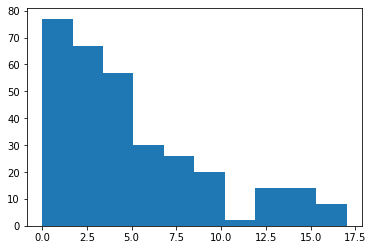

In [99]:
plt.hist(df.absences)
df.absences.value_counts()

### Sudytime, granular

,studytime,"studytime, granular"
75,2.0,-6.0
211,2.0,-6.0
21,1.0,-3.0
9,2.0,-6.0
302,3.0,-9.0
374,3.0,-9.0
247,1.0,-3.0
266,NaN,NaN
27,1.0,-3.0
276,2.0,-6.0


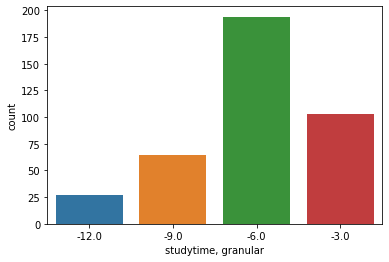

In [134]:
sns.countplot(df['studytime, granular'])
df[["studytime", "studytime, granular"]].sample(10)

# Корреляционный анализ

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.065946,-0.045051,0.027251,-0.021531,-0.080016,0.081284,0.077474,0.061575,-0.015608,1.000000,-0.016222,-0.070460


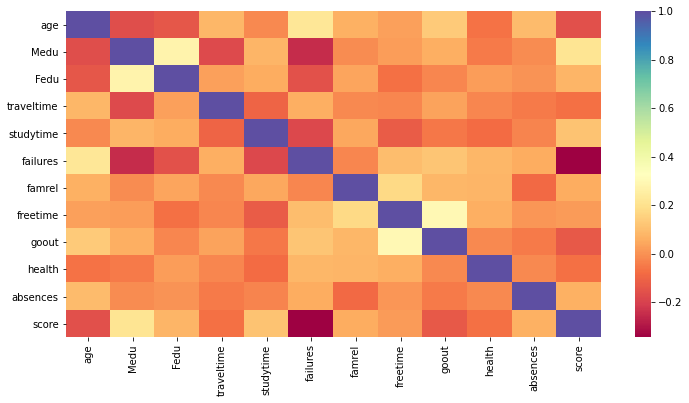

In [139]:
fig = plt.figure(figsize=(12, 6))
ax = sns.heatmap(df.corr(), linecolor='black', cmap='Spectral')

df.corr()

In [136]:
#  "studytime" и "studytime, granular" полностью скоррелировны.
# Удалим "studytime, granular"
df.drop(columns=["studytime, granular"], inplace=True)

# Анализ номинативных признаков

In [143]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [141]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

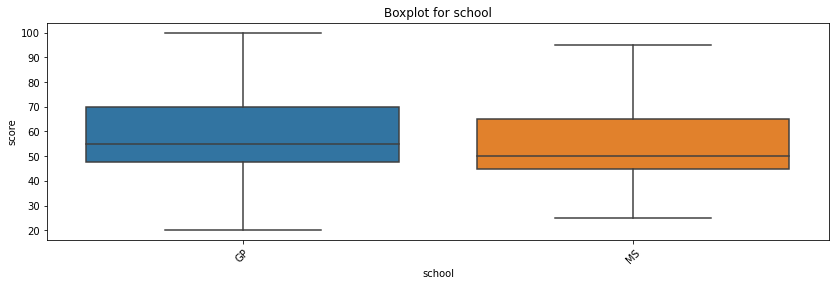

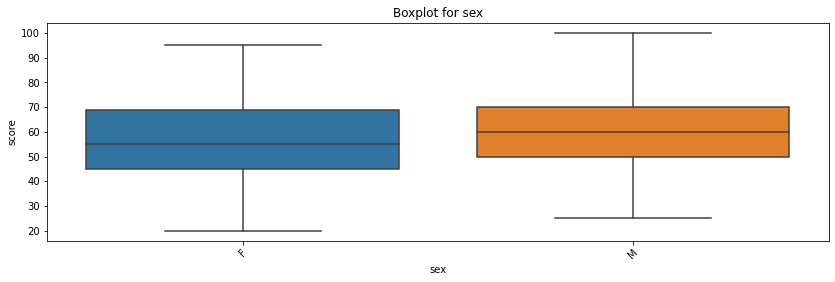

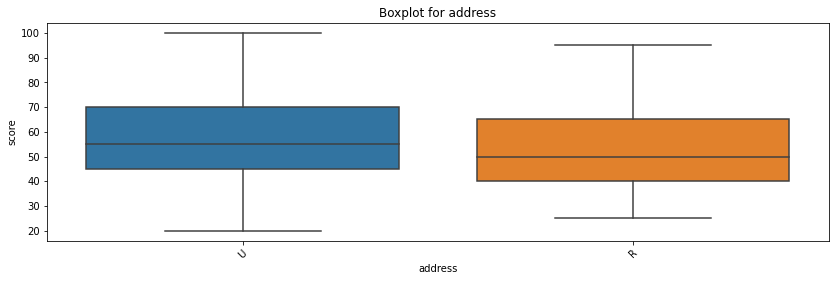

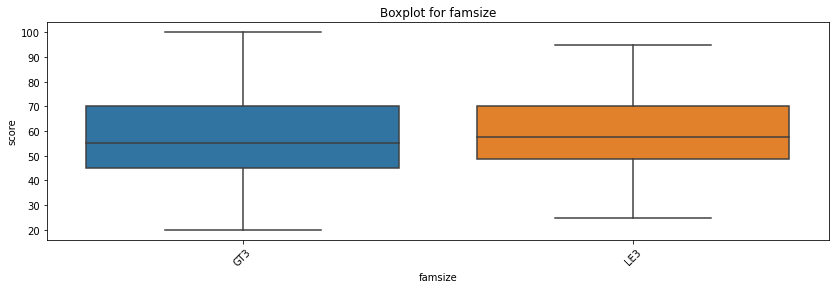

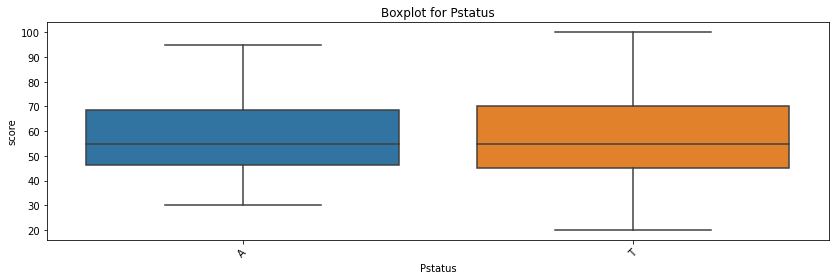

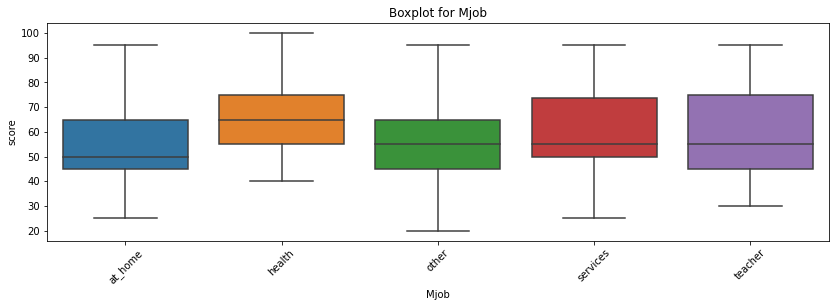

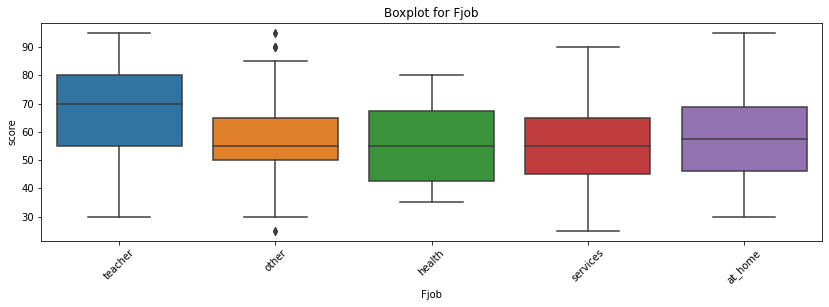

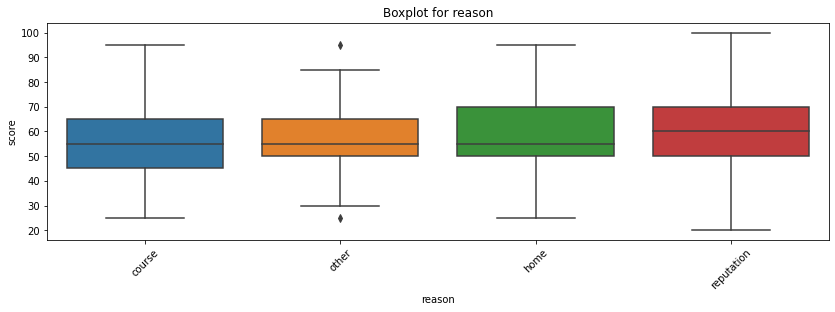

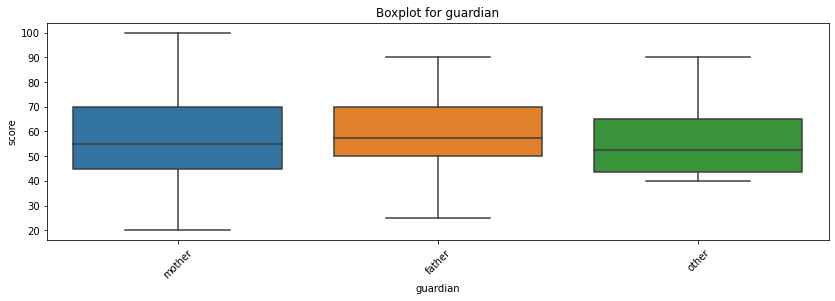

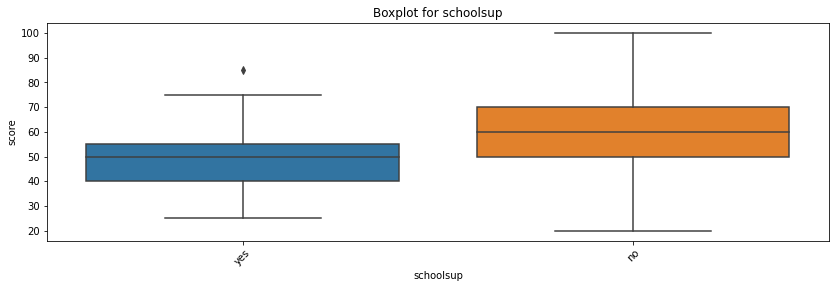

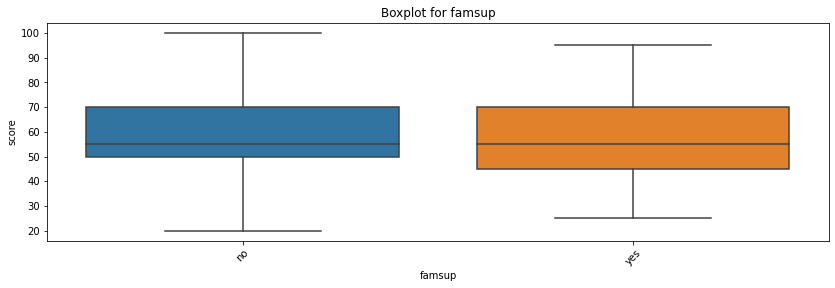

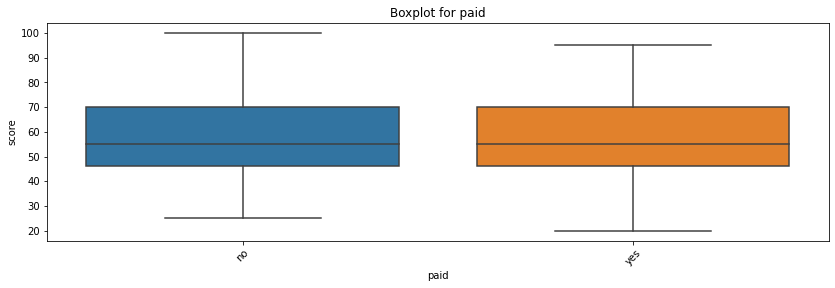

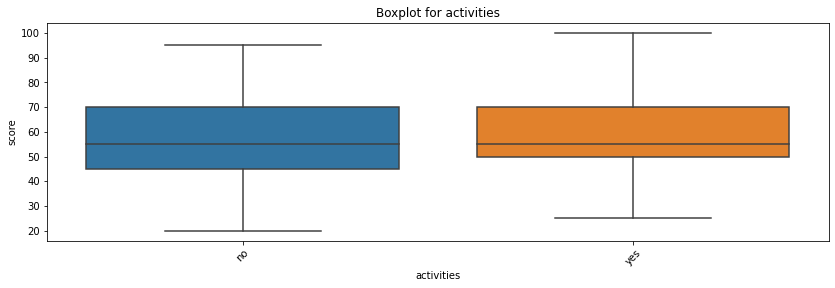

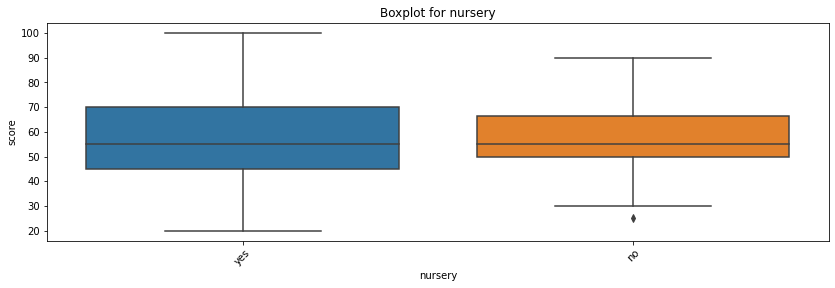

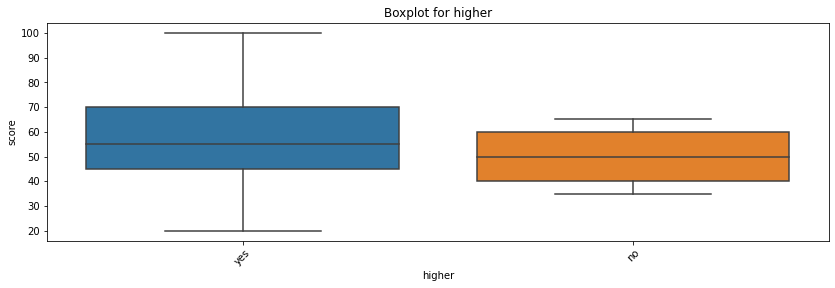

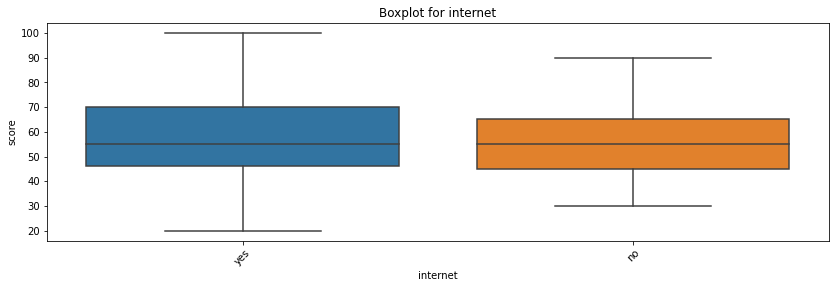

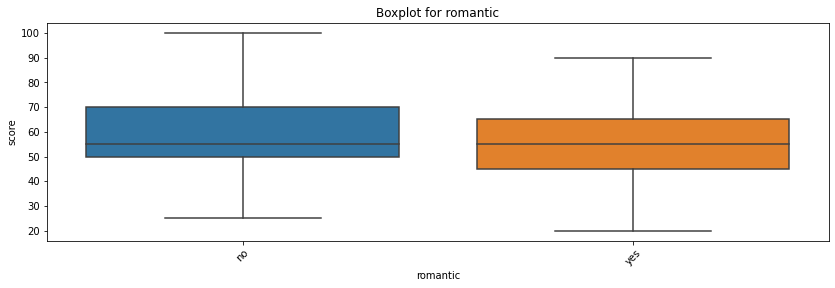

In [148]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [149]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [157]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup
